In [1]:
import pandas as pd
frames = []
for i in range(1,17):
    frames.append(pd.read_csv(r'data\dataset%d.csv'%(i), error_bad_lines=False,sep=';'))
us_election = pd.concat(frames,ignore_index=True)

In [2]:
us_election.head(10)

,ACFS,Adult.obesity,Adult.smoking,Adults.65.and.Older.Living.in.Poverty,African.American.Population,Amerindian,Asian,Asian.American.Population,At.Least.Bachelor.s.Degree,At.Least.High.School.Diploma,...,summer_TAVG,summer_TMAX,summer_TMIN,temp,temp_bins,votes,winter_PRCP,winter_TAVG,winter_TMAX,winter_TMIN
0,0.000044,0.300,0.183,6.85,23.55,0.55,2.35,2.35,37.4,87.8,...,773.000000,885.0,660.000000,15.333333,"14.9, 16.6",159473,1607.0,412.0,524.0,300.000000
1,0.000024,0.314,0.173,7.95,3.85,4.75,1.45,1.45,17.9,83.7,...,NaN,NaN,NaN,NaN,NaN,77387,NaN,NaN,NaN,NaN
2,0.000115,0.373,0.251,21.30,46.50,0.35,0.25,0.25,13.5,71.9,...,783.000000,903.0,663.000000,17.333333,"16.6, 18.5",10390,NaN,470.0,601.0,339.000000
3,0.000043,0.384,0.231,15.45,31.45,0.25,0.40,0.40,11.9,75.7,...,NaN,NaN,NaN,NaN,NaN,33218,NaN,NaN,NaN,NaN
4,0.000507,0.368,0.362,24.15,53.60,0.10,0.30,0.30,12.6,69.3,...,813.000000,918.0,708.000000,17.833333,"16.6, 18.5",4176,1662.5,454.0,561.0,347.500000
5,0.000185,0.311,0.140,12.60,1.70,1.00,1.00,1.00,13.3,71.6,...,907.166667,1056.5,758.166667,23.083333,"18.5, 25.2",40759,NaN,567.5,702.5,432.666667
6,0.000006,0.359,0.195,17.85,25.40,7.85,0.25,0.25,9.3,78.0,...,795.000000,918.0,672.000000,18.000000,"16.6, 18.5",8492,NaN,482.0,617.0,346.000000
7,0.000022,0.351,0.267,10.20,26.10,0.20,0.35,0.35,15.7,76.1,...,NaN,NaN,NaN,NaN,NaN,18504,NaN,NaN,NaN,NaN
8,0.000014,0.313,0.261,17.35,11.60,0.20,0.00,0.00,9.2,75.3,...,NaN,NaN,NaN,NaN,NaN,6931,1662.5,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,244746,NaN,NaN,NaN,NaN


In [3]:
state = set()
for i in range(3113):
    if (type(us_election.ST[i]) is not float):
        state.add(us_election.ST[i])
state_list = list(state)
votes_in_state_df = pd.DataFrame({'Votes':0,'Total':0},index = state_list)
votes_in_state_df.shape

(50, 2)

In [4]:
for i in range(3113):
    if(us_election.ST[i] in state):
        votes_in_state_df.loc[us_election.ST[i],'Votes'] = votes_in_state_df.loc[us_election.ST[i],'Votes'] + us_election['Trump D'][i]
        votes_in_state_df.loc[us_election.ST[i],'Total'] = votes_in_state_df.loc[us_election.ST[i],'Total'] + us_election['votes'][i]
votes_in_state_df

,Total,Votes
TN,2484691,1517402
HI,428825,128815
AZ,1960053,972900
DC,280272,11553
RI,411006,165810
WY,248742,174248
ND,336968,216133
NH,729632,345379
LA,2027731,1178004
IL,5374280,2118179


In [5]:
vote_rate_dic = {}
for i in range(50):
    rate = votes_in_state_df.loc[state_list[i],'Votes']/votes_in_state_df.loc[state_list[i],'Total']
    vote_rate_dic.update({state_list[i]:rate})
vote_rate_dic = sorted(vote_rate_dic.items(),key = lambda d:d[1], reverse = True)
#State that Trump has the highest vote rate
ST_T = str(vote_rate_dic[0])[2:4]
#State that Hillary has the highest vote rate
ST_H = str(vote_rate_dic[49])[2:4]

In [6]:
#Management professional and related occupations
MPRO_T = []
MPRO_H = []
#Service occupations
SO_T = []
SO_H = []
#Sales and office occupations
SOO_T = []
SOO_H = []
#Farming fishing and forestry occupations
FFFO_T = []
FFFO_H = []
#Construction extraction maintenance and repair occupations
CEMRO_T = []
CEMRO_H = []
#Production transportation and material moving occupations
PTMMO_T = []
PTMMO_H = []
County_T = []
County_H = []
for i in range(3113):
    if us_election.ST[i] == ST_T:
        MPRO_T.append(us_election['Management.professional.and.related.occupations'][i])
        SO_T.append(us_election['Service.occupations'][i])
        SOO_T.append(us_election['Sales.and.office.occupations'][i])
        FFFO_T.append(us_election['Farming.fishing.and.forestry.occupations'][i])
        CEMRO_T.append(us_election['Construction.extraction.maintenance.and.repair.occupations'][i])
        PTMMO_T.append(us_election['Production.transportation.and.material.moving.occupations'][i])
        County_T.append(us_election['County'][i])
    if us_election.ST[i] == ST_H:
        MPRO_H.append(us_election['Management.professional.and.related.occupations'][i])
        SO_H.append(us_election['Service.occupations'][i])
        SOO_H.append(us_election['Sales.and.office.occupations'][i])
        FFFO_H.append(us_election['Farming.fishing.and.forestry.occupations'][i])
        CEMRO_H.append(us_election['Construction.extraction.maintenance.and.repair.occupations'][i])
        PTMMO_H.append(us_election['Production.transportation.and.material.moving.occupations'][i])
        County_H.append(us_election['County'][i])

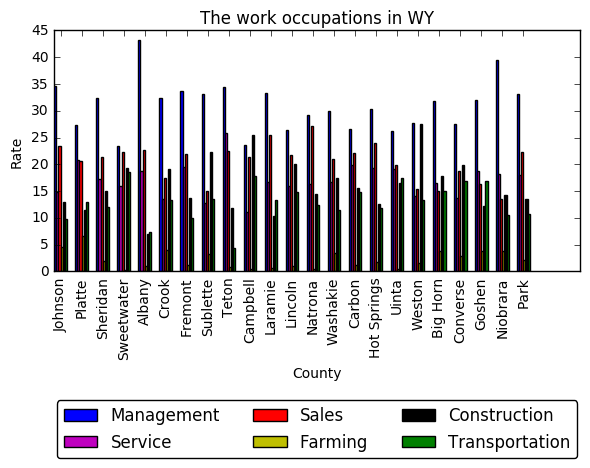

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
n = len(MPRO_T)
index = np.arange(n)
bar_width = 0.1
rects1 = plt.bar(index, MPRO_T, bar_width,
                 color='b',
                 label='Management')
rects2 = plt.bar(index + bar_width, SO_T, bar_width,
                 color='m',
                 label='Service')
rects3 = plt.bar(index + bar_width*2, SOO_T, bar_width,
                 color='r',
                 label='Sales')
rects4 = plt.bar(index + bar_width*3, FFFO_T, bar_width,
                 color='y',
                 label='Farming')
rects5 = plt.bar(index + bar_width*4, CEMRO_T, bar_width,
                 color='k',
                 label='Construction')
rects6 = plt.bar(index + bar_width*5, PTMMO_T, bar_width,
                 color='g',
                 label='Transportation')

plt.xlabel('County')
plt.ylabel('Rate')
plt.title('The work occupations in '+ST_T)
#plt.legend((rects1[0],rects2[0],rects3[0],rects4[0],rects5[0],rects6[0]),('Management','Service','Sales','Farming','Construction','Transportation'))

ax.legend(loc='upper center',bbox_to_anchor=(0.5, -0.5),
          ncol=3, fancybox=True)
plt.xticks(index+bar_width*3, County_T, rotation='vertical')
plt.tight_layout()
plt.savefig('Work_Occupation_in_%s.png'%(ST_T))
plt.show()

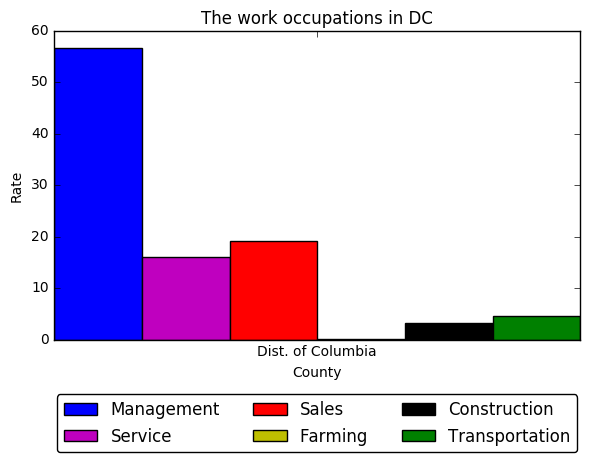

In [8]:
fig, ax = plt.subplots()
n2 = len(MPRO_H)
index2 = np.arange(n2)
bar_width2 = 0.1
rects7 = plt.bar(index2, MPRO_H, bar_width,
                 color='b',
                 label='Management')
rects8 = plt.bar(index2 + bar_width, SO_H, bar_width,
                 color='m',
                 label='Service')
rects9 = plt.bar(index2 + bar_width*2, SOO_H, bar_width,
                 color='r',
                 label='Sales')
rects10 = plt.bar(index2 + bar_width*3, FFFO_H, bar_width,
                 color='y',
                 label='Farming')
rects11 = plt.bar(index2 + bar_width*4, CEMRO_H, bar_width,
                 color='k',
                 label='Construction')
rects12 = plt.bar(index2 + bar_width*5, PTMMO_H, bar_width,
                 color='g',
                 label='Transportation')

plt.xlabel('County')
plt.ylabel('Rate')
plt.title('The work occupations in '+ST_H)

ax.legend(loc='upper center',bbox_to_anchor=(0.5, -0.15),
          ncol=3, fancybox=True)

plt.xticks(index2+bar_width2*3, County_H)
plt.tight_layout()
plt.savefig('Work_Occupation_in_%s.png'%(ST_H))
plt.show()